In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Import Required Pkgs

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

import pylab
from scipy import stats
import random

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50000)

# Import Data

In [3]:
data_dir = Path('../../data')
data_input = data_dir / 'winequality-white.csv'
data_output = Path('/')

In [4]:
df = pd.read_csv(data_input,sep = ";")

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [13]:
df.quality = df.quality.map({3:0,4:0,5:0,6:0,7:1,8:1,9:1})

In [14]:
df.quality.value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [15]:
df_columns = df.columns
numericCols = df._get_numeric_data().columns

categoricalCols = list(set(df_columns) - set(numericCols))
print('The categorical columns in transaction data are: ',categoricalCols)

The categorical columns in transaction data are:  []


# EDA

In [16]:
pandas_profiling.ProfileReport(df)

# Feature engineering and Selection

In [18]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Model - Data Prepration

In [19]:
#Splitting the data
Y = df.quality
X = df.drop(['quality'],axis = 1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3)

#Scaling data from 0 to 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM

In [21]:
def plot_learning_curve(model,title,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize = (20,5))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model,X_train, Y_train,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def svm_model(kernel='linear'):
    model =SVC(kernel = kernel)
    model.fit(X_train,Y_train)
    print("Training Accracy ",round(model.score(X_train,Y_train)*100,2),"%")
    print("Testing Accracy ",round(model.score(X_test,Y_test)*100,2),"%\n")
    p = model.predict(X_test)
    predictions = np.where(p>=0.5,1,0)
    print("Confusion Matrix: -- ")
    print(confusion_matrix(Y_test,predictions))
    plot_learning_curve(model = model,title = kernel,train_sizes=np.linspace(.1, 1.0, 5))
    plt.show()


### Linear kernel

Training Accracy  78.21 %
Testing Accracy  78.71 %

Confusion Matrix: -- 
[[1157    0]
 [ 313    0]]


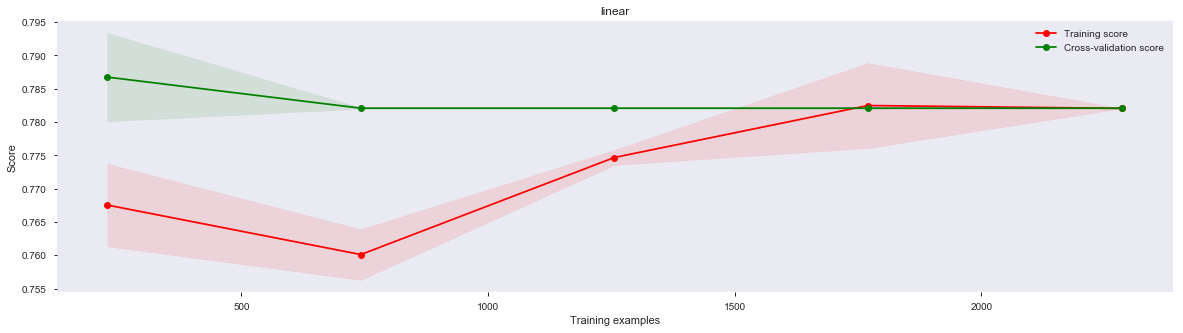

In [22]:
svm_model('linear')

### rbf kernel

Training Accracy  78.21 %
Testing Accracy  78.71 %

Confusion Matrix: -- 
[[1157    0]
 [ 313    0]]


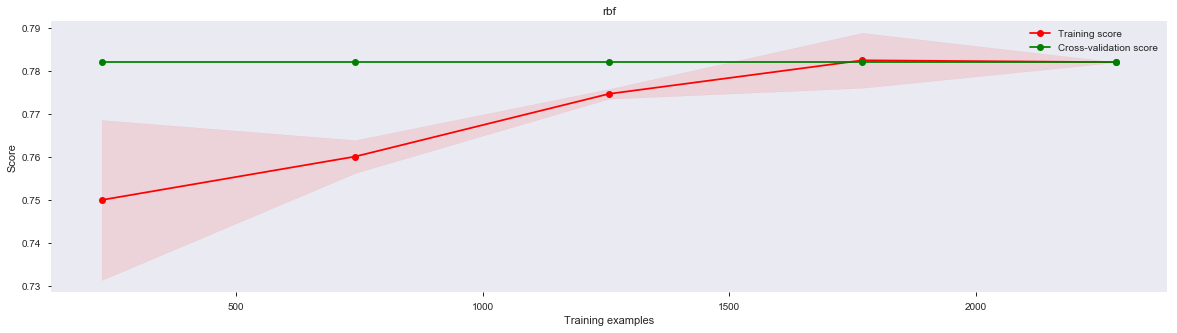

In [23]:
svm_model('rbf')

### poly kernel

Training Accracy  78.21 %
Testing Accracy  78.71 %

Confusion Matrix: -- 
[[1157    0]
 [ 313    0]]


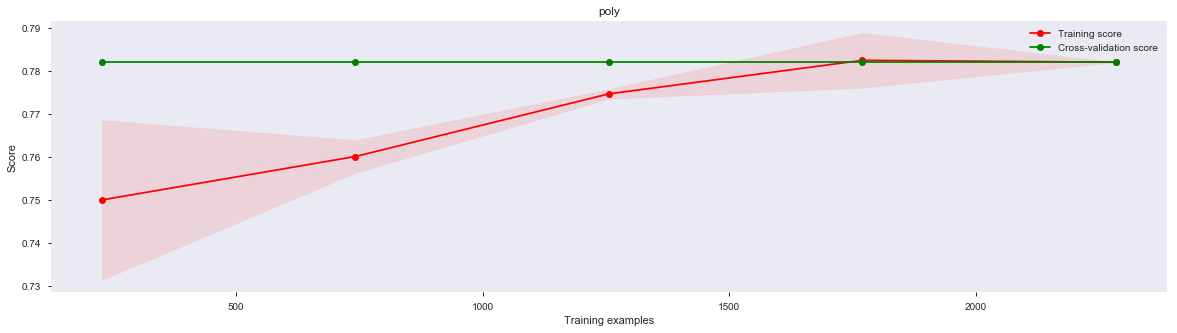

In [24]:
svm_model('poly')

# Decision Tree

In [25]:
def decision_tree(criterion,depth):
    clf = DecisionTreeClassifier(criterion=criterion,max_depth = depth)
    clf = clf.fit(X_train, Y_train)
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data) 
     
    print("Training Accracy ",round(clf.score(X_train,Y_train)*100,2),"%")
    print("Testing Accracy ",round(clf.score(X_test,Y_test)*100,2),"%\n")
    p = clf.predict(X_test)
    predictions = np.where(p>=0.5,1,0)
    print("Confusion Matrix: -- ")
    print(confusion_matrix(Y_test,predictions))
    plot_learning_curve(model = clf,title = "Decision Tree",train_sizes=np.linspace(.1, 1.0, 5))
    plt.show()
    return(graph)

Training Accracy  100.0 %
Testing Accracy  81.63 %

Confusion Matrix: -- 
[[1011  146]
 [ 124  189]]


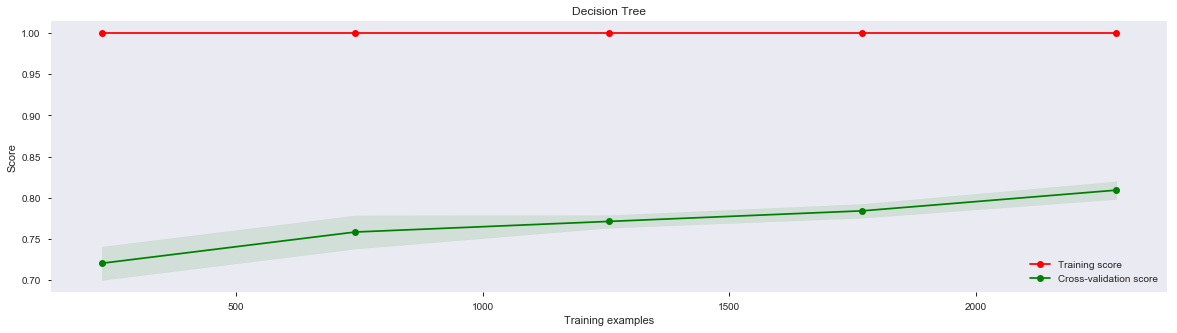

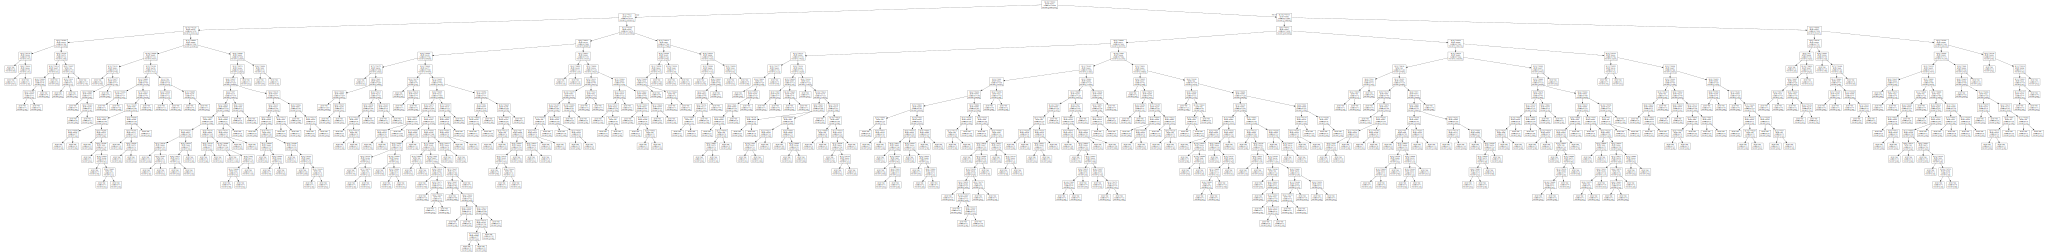

In [26]:
decision_tree(criterion = 'gini',depth = 40)

Training Accracy  100.0 %
Testing Accracy  83.33 %

Confusion Matrix: -- 
[[1026  131]
 [ 114  199]]


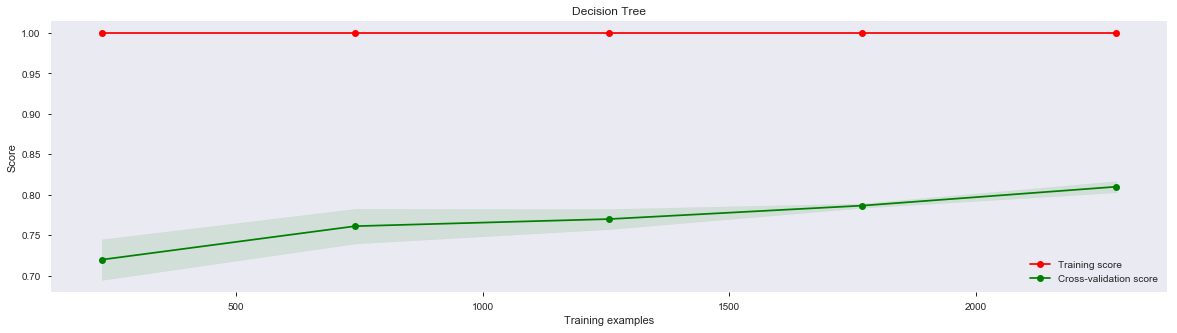

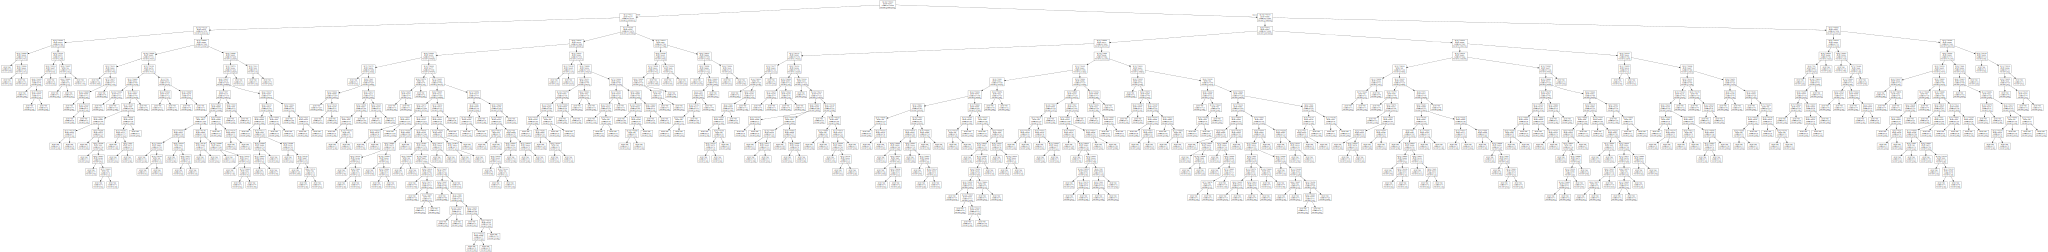

In [27]:
decision_tree(criterion = 'gini',depth = 25)

Training Accracy  94.22 %
Testing Accracy  81.77 %

Confusion Matrix: -- 
[[1031  126]
 [ 142  171]]


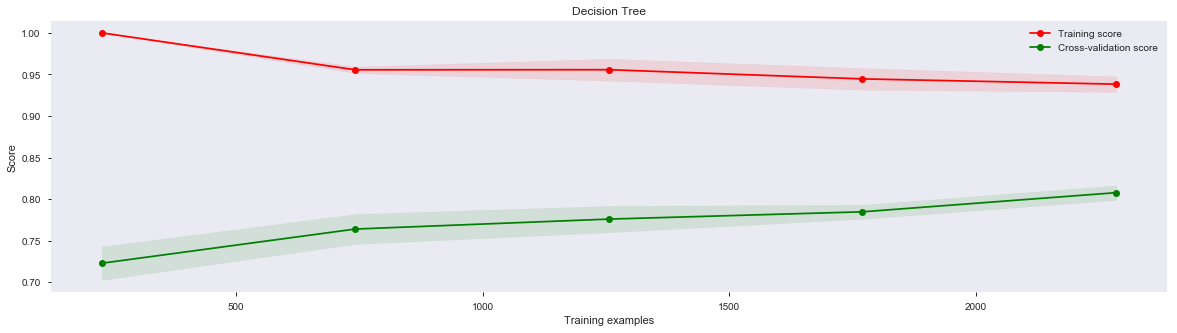

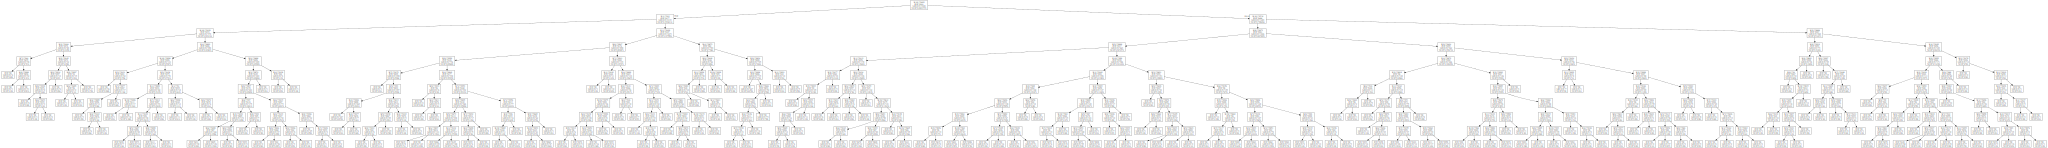

In [28]:
decision_tree(criterion = 'gini',depth = 10)

Training Accracy  80.43 %
Testing Accracy  79.59 %

Confusion Matrix: -- 
[[1115   42]
 [ 258   55]]


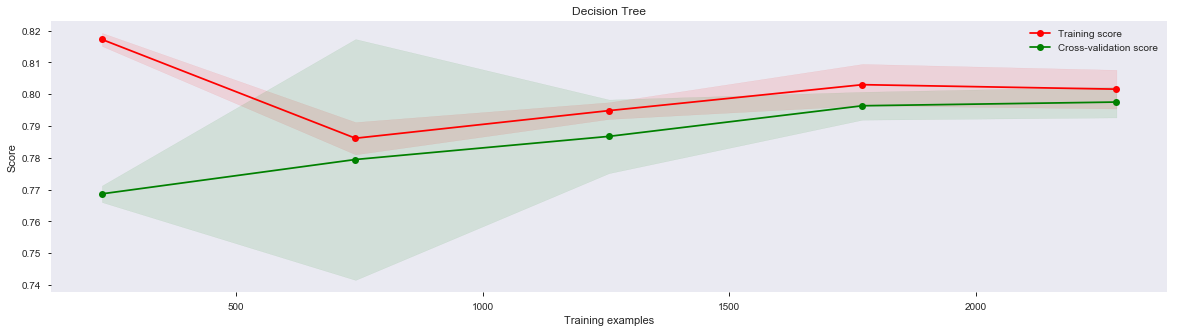

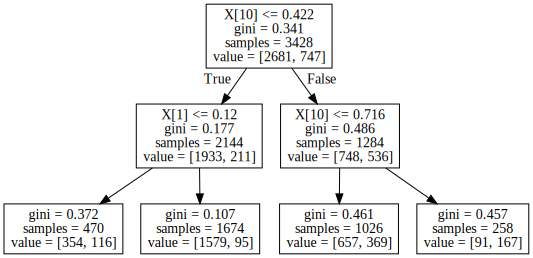

In [29]:
decision_tree(criterion = 'gini',depth = 2)

# Gradient Boosting

In [30]:
def Gradient_Boosting(n_estimators,depth):
    clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=n_estimators, max_depth=depth)
    clf = clf.fit(X_train, Y_train)     
    print("Training Accracy ",round(clf.score(X_train,Y_train)*100,2),"%")
    print("Testing Accracy ",round(clf.score(X_test,Y_test)*100,2),"%\n")
    p = clf.predict(X_test)
    predictions = np.where(p>=0.5,1,0)
    print("Confusion Matrix: -- ")
    print(confusion_matrix(Y_test,predictions))
    plot_learning_curve(model = clf,title = "Gradient Boosting Tree",train_sizes=np.linspace(.1, 1.0, 5))
    plt.show()

Training Accracy  100.0 %
Testing Accracy  83.33 %

Confusion Matrix: -- 
[[1038  119]
 [ 126  187]]


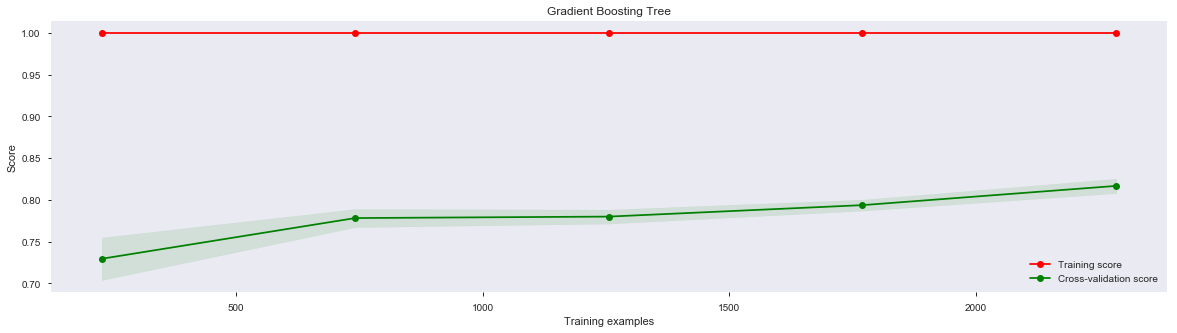

In [31]:
Gradient_Boosting(100,30)

Training Accracy  100.0 %
Testing Accracy  87.41 %

Confusion Matrix: -- 
[[1098   59]
 [ 126  187]]


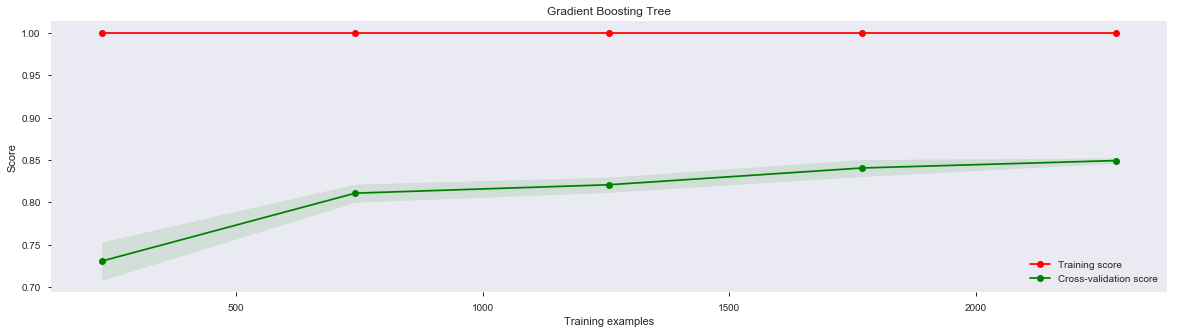

In [32]:
Gradient_Boosting(100,10)

# CrossValidation

In [33]:
svm = SVC()
dtree = DecisionTreeClassifier(criterion = 'gini',max_depth = 10)
boosting = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=10)

In [34]:
scores = cross_val_score(svm,X,Y,cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.04)


In [35]:
scores = cross_val_score(dtree,X,Y,cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.06)


In [36]:
scores = cross_val_score(boosting,X,Y,cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.05)
